In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt

# Set-up to have matplotlib use its support for notebook inline plots
%matplotlib inline

In [3]:
bcheck=pd.read_csv('/Users/venkatasaisahitpotnuru/Downloads/nics-firearm-background-checks.csv')

In [4]:
bcheck['date']=pd.to_datetime(bcheck['month'])

In [5]:
bcheck['date']=bcheck['date'].astype(str)

In [6]:
bcheck['year']=bcheck['date'].apply(lambda x: x[:4])

In [7]:
bcheck['total_dealer_checks']=bcheck.iloc[:,3:8].agg(sum, axis=1)
bcheck['total_private']=bcheck.iloc[:,21:23].agg(sum, axis=1)

In [8]:
bcheck.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,date,year,total_dealer_checks,total_private
0,2021-10,Alabama,25822.0,258.0,19188.0,15531.0,1309.0,956,0.0,12.0,...,23.0,6.0,0.0,1.0,0.0,66499,2021-10-01,2021,37242.0,29.0
1,2021-10,Alaska,129.0,7.0,3242.0,3222.0,340.0,254,0.0,0.0,...,17.0,0.0,1.0,0.0,0.0,7572,2021-10-01,2021,7065.0,17.0
2,2021-10,Arizona,4170.0,1069.0,18744.0,10232.0,1561.0,991,0.0,11.0,...,7.0,0.0,1.0,1.0,0.0,38523,2021-10-01,2021,32597.0,7.0
3,2021-10,Arkansas,2591.0,505.0,7360.0,7994.0,488.0,423,6.0,8.0,...,12.0,1.0,0.0,0.0,0.0,21518,2021-10-01,2021,16770.0,13.0
4,2021-10,California,15704.0,10895.0,40185.0,28159.0,5364.0,0,0.0,1.0,...,3196.0,597.0,32.0,25.0,0.0,114144,2021-10-01,2021,84603.0,3793.0


In [9]:
bcheck_year=bcheck[['totals','year','total_dealer_checks','total_private']].groupby('year').sum()

In [10]:
bcheck_year=bcheck_year.reset_index()

No handles with labels found to put in legend.


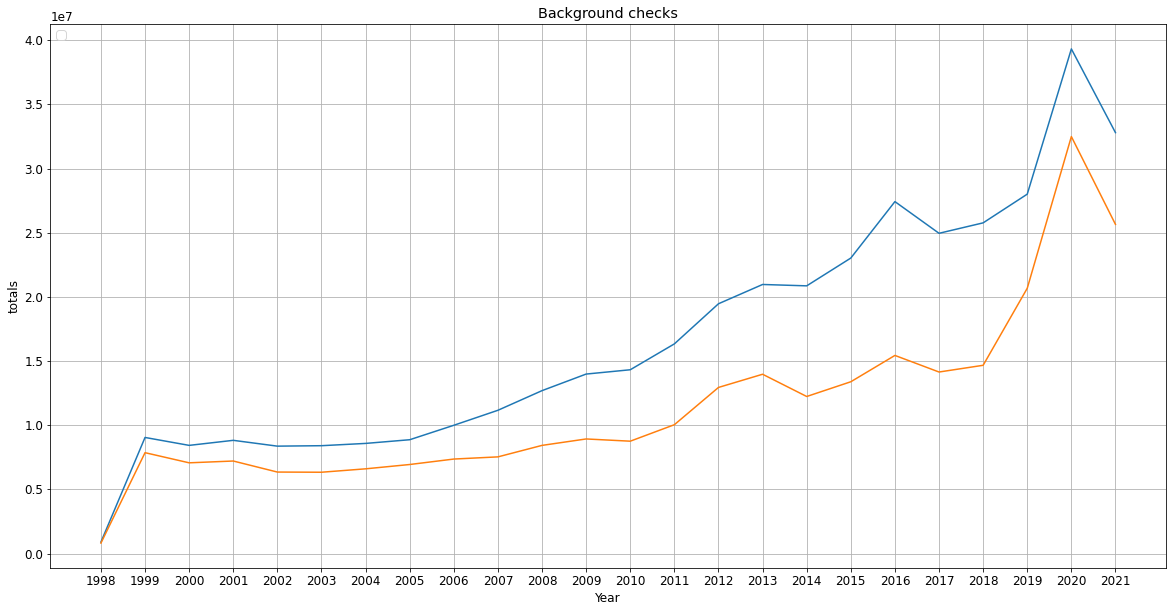

In [11]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(20, 10))

# Specify how our lines should look
ax.plot(bcheck_year.year,bcheck_year.totals)
ax.plot(bcheck_year.year,bcheck_year.total_dealer_checks)

# Same as above
ax.set_xlabel('Year')
ax.set_ylabel('totals')
ax.set_title('Background checks')
ax.grid(True)
ax.legend(loc='upper left');

In [12]:
bcheck_year_state=bcheck[['totals','year','total_dealer_checks','total_private','state']].groupby(['year','state']).sum()

In [13]:
bcheck_year_state=bcheck_year_state.reset_index()

In [14]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [15]:
us_state_codes= pd.DataFrame.from_dict(us_state_to_abbrev, orient='index')

In [16]:
us_state_codes= us_state_codes.reset_index()

In [17]:
us_state_codes=us_state_codes.set_axis(['state','codes'],axis=1)

In [18]:
bcheck_year_state.info()
us_state_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1320 non-null   object 
 1   state                1320 non-null   object 
 2   totals               1320 non-null   int64  
 3   total_dealer_checks  1320 non-null   float64
 4   total_private        1320 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 51.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   state   57 non-null     object
 1   codes   57 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [19]:
bcheck_year_state=bcheck_year_state.set_axis(["year","state","totals","total_dealer_checks","total_private"],axis=1)

In [20]:
bcheck_year_state_with_codes = pd.merge(bcheck_year_state, us_state_codes, how="left", on=["state","state"])

In [21]:
bcheck_state=bcheck[['totals','total_dealer_checks','total_private','state']].groupby(['state']).sum()
bcheck_state=bcheck_state.reset_index()

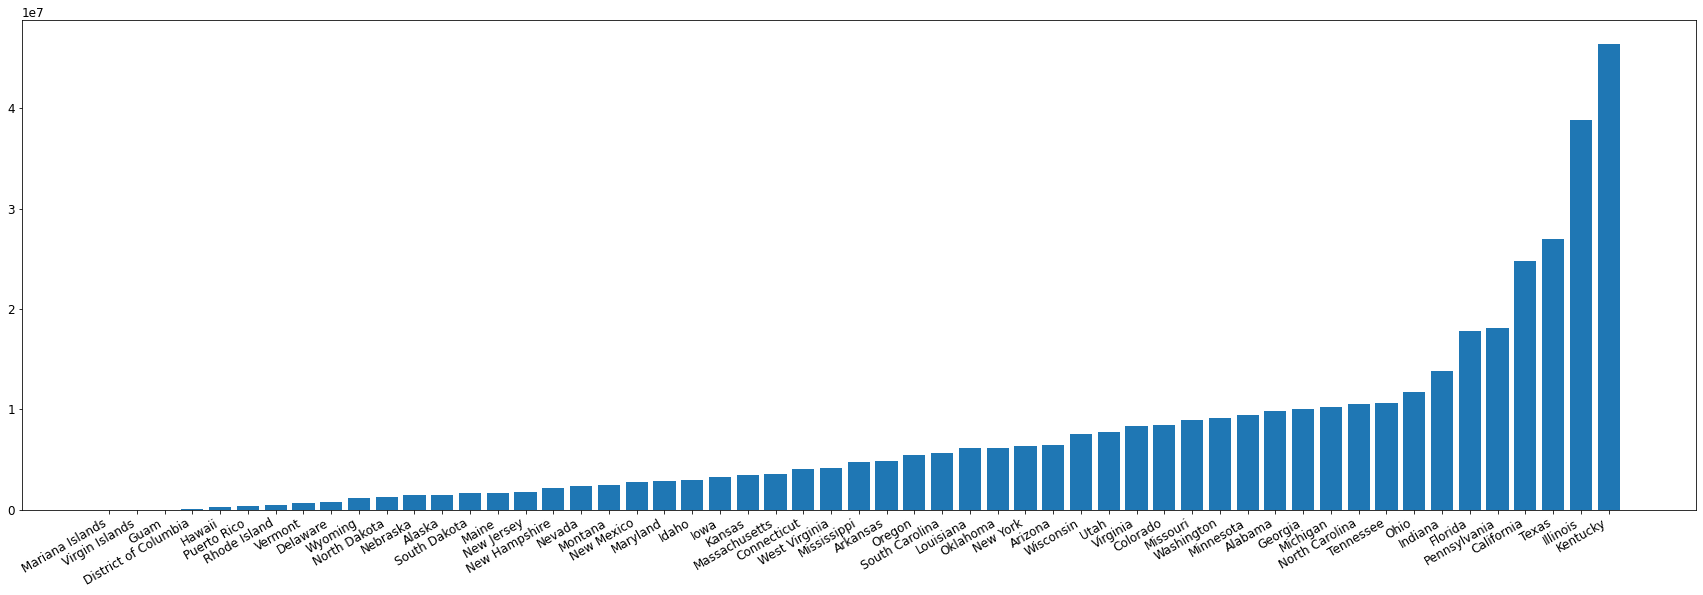

In [82]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(30, 10))
bcheck_state=bcheck_state.sort_values('totals')
ax.bar(bcheck_state.state,bcheck_state.totals)
fig.autofmt_xdate()
plt.show()

In [23]:
import json
import requests
state_list=['AL',
'AK',
'AZ',
'AR',
'CA',
'CO',
'CT',
'DE',
'FL',
'GA',
'HI',
'ID',
'IL',
'IN',
'IA',
'KS',
'KY',
'LA',
'ME',
'MD',
'MA',
'MI',
'MN',
'MS',
'MO',
'MT',
'NE',
'NV',
'NH',
'NJ',
'NM',
'NY',
'NC',
'ND',
'OH',
'OK',
'OR',
'PA',
'RI',
'SC',
'SD',
'TN',
'TX',
'UT',
'VT',
'VA',
'WA',
'WV',
'WI',
'WY']

def violentcrime_data(start_year,end_year,state_list):
    df=pd.DataFrame()
    for state in state_list:
        url = "https://api.usa.gov/crime/fbi/sapi/api/arrest/states/offense/{}/violent_crime/{}/{}?API_KEY=1mL3ffuFKhgkkiHWBy5bFzhSDNjN6IJYQQVIypY9".format(state,start_year,end_year)
    #     print(url)
        payload={}
        headers = {}

        response = requests.request("GET", url, headers=headers, data=payload)
    #     print(response.text)

        data1=response.json()
        try:
            df1=pd.json_normalize(data1['data'])
            df1['state']=state
            df=df.append(df1)
        except KeyError:
            pass

        
    return df
    

df_violent_crime = violentcrime_data('1998','2020',state_list)


In [24]:
df_violent_crime

,value,data_year,month_num,key,state
0,6014,1998,0,Aggravated Assault,AL
1,5741,1999,0,Aggravated Assault,AL
2,4016,2000,0,Aggravated Assault,AL
3,3614,2001,0,Aggravated Assault,AL
4,4351,2002,0,Aggravated Assault,AL
...,...,...,...,...,...
202,0,2016,0,Human Trafficking - Involuntary Servitude,WY
203,0,2017,0,Human Trafficking - Involuntary Servitude,WY
204,0,2018,0,Human Trafficking - Involuntary Servitude,WY
205,0,2019,0,Human Trafficking - Involuntary Servitude,WY


In [25]:
df_violent_crime=df_violent_crime.set_axis(['crimes','year','month','crime_type','state'],axis=1)

In [26]:
df_violent_crime=df_violent_crime.drop(['month'],axis=1)

In [90]:
df_violent_crime

,crimes,year,crime_type,state
0,6014,1998,Aggravated Assault,AL
1,5741,1999,Aggravated Assault,AL
2,4016,2000,Aggravated Assault,AL
3,3614,2001,Aggravated Assault,AL
4,4351,2002,Aggravated Assault,AL
...,...,...,...,...
202,0,2016,Human Trafficking - Involuntary Servitude,WY
203,0,2017,Human Trafficking - Involuntary Servitude,WY
204,0,2018,Human Trafficking - Involuntary Servitude,WY
205,0,2019,Human Trafficking - Involuntary Servitude,WY


In [27]:
df_violent_crime_year=df_violent_crime[['crimes','year','crime_type']].groupby('year').sum()
df_violent_crime_year=df_violent_crime_year.reset_index()

In [28]:
df_violent_crime_year_state=df_violent_crime[['crimes','year','crime_type','state']].groupby(['year','state']).sum()
df_violent_crime_year_state=df_violent_crime_year_state.reset_index()

In [29]:
df_violent_crime_year.info()
bcheck_year.info()
bcheck_year['year']=bcheck_year['year'].astype(str).astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    23 non-null     int64
 1   crimes  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 24 non-null     object 
 1   totals               24 non-null     int64  
 2   total_dealer_checks  24 non-null     float64
 3   total_private        24 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 896.0+ bytes


In [30]:
bcheck_crimes_year=pd.merge(bcheck_year,df_violent_crime_year, how="left", on=["year",'year'])

In [31]:
bcheck_crimes_year=bcheck_crimes_year.drop([0,23])

In [32]:
bcheck_crimes_year.head()

,year,totals,total_dealer_checks,total_private,crimes
1,1999,9043747,7857932.0,0.0,1510660.0
2,2000,8427096,7067634.0,0.0,1527955.0
3,2001,8820045,7207720.0,0.0,1570066.0
4,2002,8367069,6347492.0,0.0,1531657.0
5,2003,8402244,6333371.0,0.0,1480952.0


In [87]:
def correlationplotnew(dataframe,plot_name):
    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
    heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(plot_name, fontdict={'fontsize':18}, pad=16)
    return heatmap

<AxesSubplot:title={'center':'bcheck crimes'}>

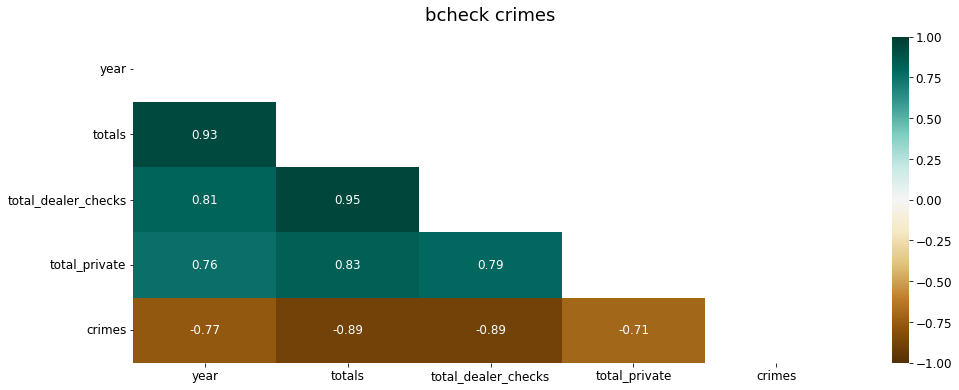

In [86]:
correlationplotnew(bcheck_crimes_year,'bcheck crimes')

Crimes are negatively correlated with background checks which implies that the viloent crimes are reducing with increase in background checks. When all states are included 

In [34]:
df_violent_crime_year_state.info()
df_violent_crime_year_state['year']=df_violent_crime_year_state['year'].astype(str)
# df_violent_crime_year_state['year']=df_violent_crime_year_state['year'].strip()
df_violent_crime_year_state['state']=df_violent_crime_year_state['state'].str.strip()
# bcheck_year_state['year']=bcheck_year_state['year'].strip()
bcheck_year_state['state']=bcheck_year_state['state'].str.strip()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    1126 non-null   int64 
 1   state   1126 non-null   object
 2   crimes  1126 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.5+ KB


In [35]:
bcheck_year_state_with_codes=bcheck_year_state_with_codes.drop('state',axis=1)

In [36]:
bcheck_crimes_state_year = pd.merge(bcheck_year_state_with_codes, df_violent_crime_year_state,  how='right', left_on=['year','codes'], right_on = ['year','state'])

In [38]:
    states=['CA',
    'CO',
    'CT',
    'DE',
    'MD',
    'NV',
    'NJ',
    'NM',
    'NY',
    'OR',
    'RI',
    'VT',
    'VA',
    'WA']
def statefilter(states,bcheck_crimes_state_year):
    
    list_of_states =states
    df=bcheck_crimes_state_year[bcheck_crimes_state_year['codes'].isin(list_of_states)]
    df=df.reset_index()
    return df

filtered_bcheck_crimes_state_year=statefilter(states,bcheck_crimes_state_year)


In [42]:
def stateaggregation(df):
    
    df=df[['year','totals','total_dealer_checks','total_private','crimes']].groupby(['year']).sum()
    df=df.reset_index()
    return df
filtered_bcheck_crimes_state_year_aggregated=stateaggregation(filtered_bcheck_crimes_state_year)


In [43]:
filtered_bcheck_crimes_state_year_aggregated.drop([0])

,year,totals,total_dealer_checks,total_private,crimes
1,1999,2254126,1990914.0,0.0,651711
2,2000,2111994,1750516.0,0.0,646773
3,2001,2273583,1842581.0,0.0,659721
4,2002,1941096,1535238.0,0.0,587384
5,2003,1808799,1434373.0,0.0,564517
6,2004,1867479,1513182.0,0.0,569896
7,2005,1980702,1633367.0,0.0,577599
8,2006,2117310,1708505.0,0.0,579113
9,2007,2412615,1896861.0,0.0,580519
10,2008,2603163,2013531.0,0.0,581425


<AxesSubplot:title={'center':'Filtered with states where dealer check is mandatory'}>

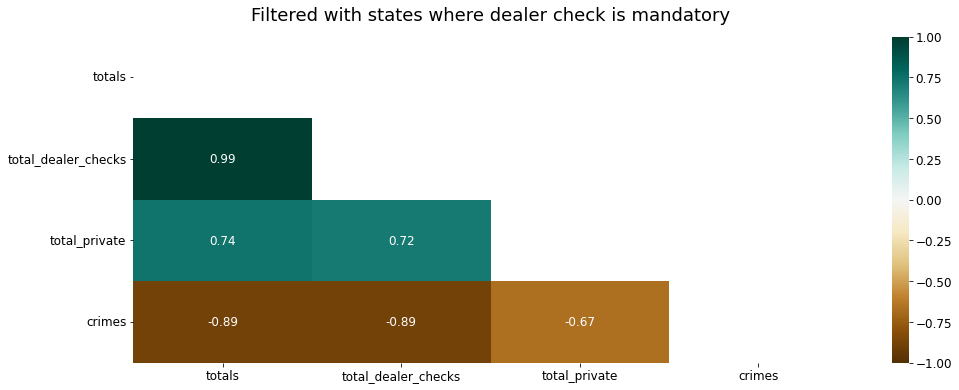

In [88]:
correlationplotnew(filtered_bcheck_crimes_state_year_aggregated,'Filtered with states where dealer check is mandatory')

<AxesSubplot:>

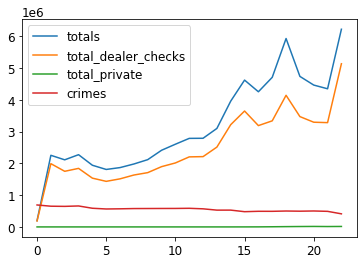

In [45]:
filtered_bcheck_crimes_state_year_aggregated.plot()

In [46]:
firearm_homicides=pd.read_csv('/Users/venkatasaisahitpotnuru/Downloads/firearm_homicides.csv')

In [47]:
firearm_homicides

,year,Total_No_of_Incidents,Number_of_deaths,Mass_Shootings,Defensive_use,Unintentional_shooting
0,2014,39573,12357,272,1463,1640
1,2015,48161,13559,335,1396,1993
2,2016,54721,15125,382,1993,2234
3,2017,58110,15725,348,2119,2066
4,2018,54138,14908,336,1878,1691
5,2019,39557,15467,417,1607,1907
6,2020,43635,19479,611,1488,2325


In [48]:
bcheck_year.head()

,year,totals,total_dealer_checks,total_private
0,1998,891898,811510.0,0.0
1,1999,9043747,7857932.0,0.0
2,2000,8427096,7067634.0,0.0
3,2001,8820045,7207720.0,0.0
4,2002,8367069,6347492.0,0.0


In [49]:
homicide_bcheck_year=pd.merge(bcheck_year,firearm_homicides, how='right',on=['year','year'])

In [50]:
homicide_bcheck_year.head()

,year,totals,total_dealer_checks,total_private,Total_No_of_Incidents,Number_of_deaths,Mass_Shootings,Defensive_use,Unintentional_shooting
0,2014,20860241,12236352.0,1444.0,39573,12357,272,1463,1640
1,2015,23026288,13385123.0,6276.0,48161,13559,335,1396,1993
2,2016,27425512,15437134.0,12080.0,54721,15125,382,1993,2234
3,2017,24955919,14144306.0,20986.0,58110,15725,348,2119,2066
4,2018,25769441,14668305.0,26221.0,54138,14908,336,1878,1691


<AxesSubplot:title={'center':'Homicides bchecks'}>

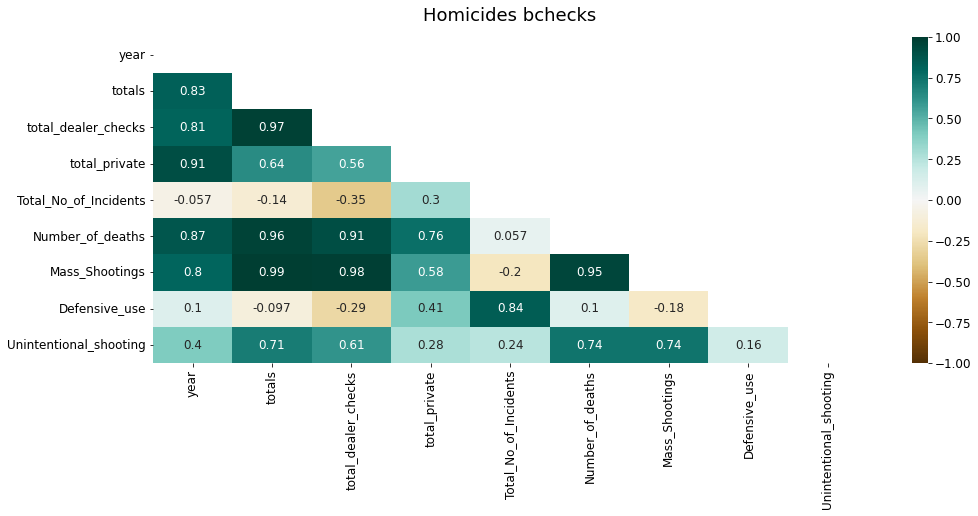

In [85]:
correlationplotnew(homicide_bcheck_year,'Homicides bchecks')

In [67]:
df_arrest_adult=pd.read_csv('/Users/venkatasaisahitpotnuru/Downloads/arrests_national_adults.csv')
df_arrest_juvi=pd.read_csv('/Users/venkatasaisahitpotnuru/Downloads/arrests_national_juvenile.csv')

df_arrest_adult['total_arrests']=df_arrest_adult['total_male']+df_arrest_adult['total_female']
    
df_arrest_juvi['total_arrests']=df_arrest_juvi['total_male']+df_arrest_juvi['total_female']


In [68]:
def arrestdataviolentcrimes(df_arrest):
    
    df_arrest['total_arrests']=df_arrest['total_male']+df_arrest['total_female']
    list_of_violent_crimes =['Murder and Nonnegligent Homicide','Aggravated Assault','Rape','Robbery','Sex Offenses','Manslaughter by Negligence','Simple Assault']
    df_arrest_violent_crimes=df_arrest[df_arrest['offense_name'].isin(list_of_violent_crimes)]
    df_arrest_violent_crimes=df_arrest_violent_crimes[['year','total_arrests','white','black','asian_pacific_islander','american_indian']].groupby('year').sum().reset_index()

    return df_arrest_violent_crimes

def arrestdatahomicide(df_arrest):
    
    df_arrest['total_arrests']=df_arrest['total_male']+df_arrest['total_female']
    list_of_homicides=['Murder and Nonnegligent Homicide','Manslaughter by Negligence']
    df_arrest_homicides=df_arrest[df_arrest['offense_name'].isin(list_of_homicides)]
    df_arrest_homicides=df_arrest_homicides[['year','total_arrests','white','black','asian_pacific_islander','american_indian']].groupby('year').sum().reset_index()
    
    return df_arrest_homicides

In [ ]:
# df_arrest['total_arrests']=df_arrest['total_male']+df_arrest['total_female']
# list_of_violent_crimes =['Murder and Nonnegligent Homicide','Aggravated Assault','Rape','Robbery','Sex Offenses','Manslaughter by Negligence','Simple Assault']
# list_of_homicides=['Murder and Nonnegligent Homicide','Manslaughter by Negligence']
# df_arrest_violent_crimes=df_arrest[df_arrest['offense_name'].isin(list_of_violent_crimes)]
# df_arrest_homicides=df_arrest[df_arrest['offense_name'].isin(list_of_homicides)]


In [ ]:
# df_arrest_violent_crimes=df_arrest_violent_crimes[['year','total_arrests','white','black','asian_pacific_islander','american_indian']].groupby('year').sum().reset_index()
# df_arrest_homicides=df_arrest_homicides[['year','total_arrests','white','black','asian_pacific_islander','american_indian']].groupby('year').sum().reset_index()

In [ ]:
# arrest_violent_crime_bcheck_year=pd.merge(bcheck_year,df_arrest_violent_crimes, how='right',on=['year','year'])
# arrest_homicides_bcheck_year=pd.merge(bcheck_year,df_arrest_homicides, how='right',on=['year','year'])


In [69]:
def joincrimesandbchecks(bcheck_year,crimes_year):
    arrest_bcheck_year=pd.merge(bcheck_year,crimes_year, how='right',on=['year','year'])
    return arrest_bcheck_year

In [ ]:
# correlationplot(arrest_violent_crime_bcheck_year)

In [ ]:
# correlationplot(arrest_homicides_bcheck_year)

In [70]:
frames =[df_arrest_adult,df_arrest_juvi]
arrest_adult_juvi=pd.concat(frames)

In [89]:
pd.concat([df_arrest_adult,df_arrest_juvi])

,id,state_abbr,year,offense_code,offense_name,agencies,population,total_male,total_female,m_18,...,m_13_14,m_15,m_16,m_17,f_0_9,f_10_12,f_13_14,f_15,f_16,f_17
0,1009,NaN,2016,ASR_ARSON,Arson,13310,264534532,4509,1426,161.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1010,NaN,2016,ASR_AST,Aggravated Assault,13310,264534532,224176,67016,5780.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1011,NaN,2016,ASR_AST_SMP,Simple Assault,13310,264534532,570193,213178,14018.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1012,NaN,2016,ASR_BRG,Burglary,13310,264534532,116213,28754,7077.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1013,NaN,2016,ASR_DIS,Disorderly Conduct,13310,264534532,180722,68577,6997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,446,NaN,1994,ASR_STP,Stolen Property,10713,208091172,32205,4105,NaN,...,7495.0,6492.0,7796.0,8534.0,29.0,221.0,1150.0,905.0,937.0,863.0
686,447,NaN,1994,ASR_SUS,Suspicion,10713,208091172,1389,330,NaN,...,285.0,320.0,324.0,326.0,9.0,24.0,99.0,76.0,64.0,58.0
687,448,NaN,1994,ASR_VAG,Vagrancy,10713,208091172,2979,683,NaN,...,549.0,632.0,787.0,869.0,NaN,26.0,206.0,143.0,159.0,149.0
688,449,NaN,1994,ASR_VAN,Vandalism,10713,208091172,110175,12616,NaN,...,32484.0,19222.0,19479.0,17267.0,479.0,1790.0,4161.0,2272.0,2050.0,1864.0


In [77]:
def correlationplotnew(dataframe,plot_name):
    plt.figure(figsize=(16, 6))
    mask = np.triu(np.ones_like(dataframe.corr(), dtype=bool))
    heatmap = sns.heatmap(dataframe.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title(plot_name, fontdict={'fontsize':18}, pad=16)
    return heatmap

<AxesSubplot:title={'center':'Adult & Juvi'}>

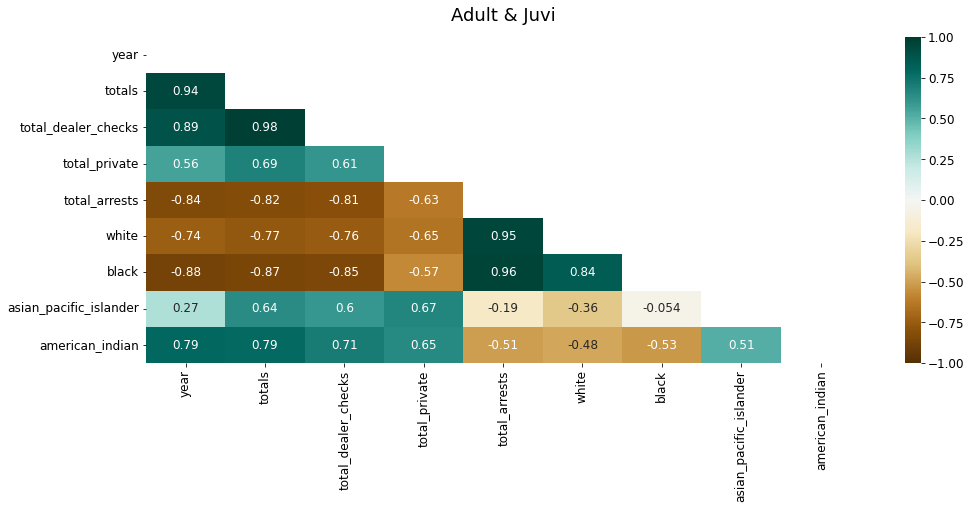

In [78]:
correlationplotnew(joincrimesandbchecks(bcheck_year,arrestdataviolentcrimes(arrest_adult_juvi)),'Adult & Juvi')

<AxesSubplot:title={'center':'Adult'}>

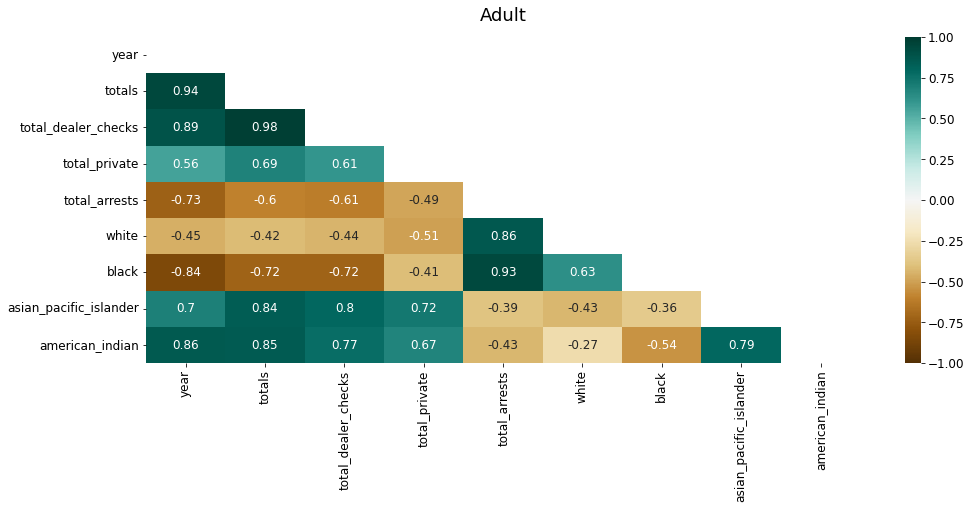

In [79]:
correlationplotnew(joincrimesandbchecks(bcheck_year,arrestdataviolentcrimes(df_arrest_adult)),'Adult')

<AxesSubplot:title={'center':'Juvi'}>

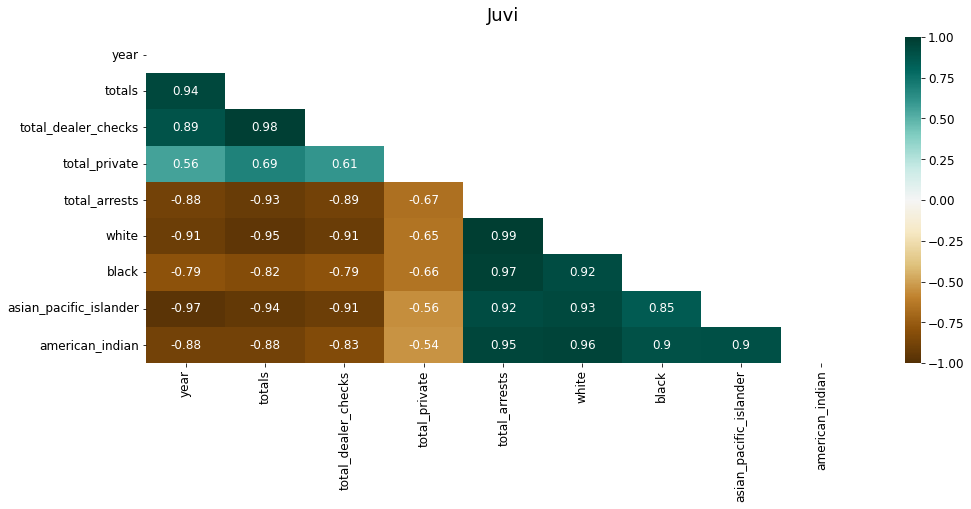

In [80]:
correlationplotnew(joincrimesandbchecks(bcheck_year,arrestdataviolentcrimes(df_arrest_juvi)),'Juvi')

<AxesSubplot:title={'center':'Homicides'}>

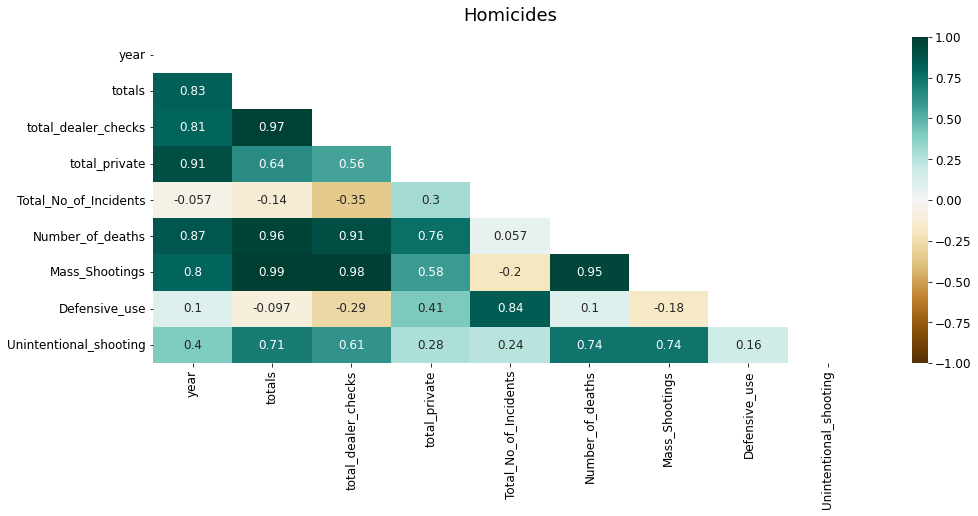

In [81]:
correlationplotnew(joincrimesandbchecks(bcheck_year,firearm_homicides),'Homicides')